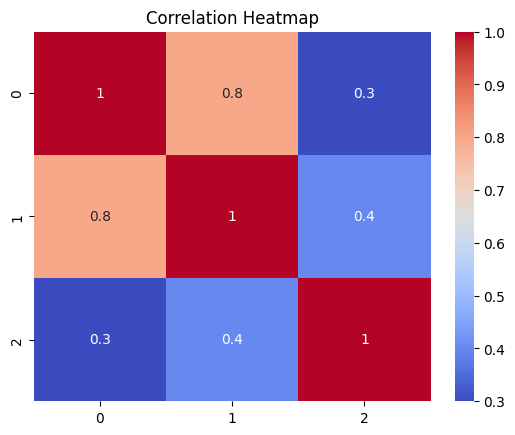

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Sample data
data = np.array([[1, 0.8, 0.3],
                 [0.8, 1, 0.4],
                 [0.3, 0.4, 1]])

# Create the heatmap
sns.heatmap(data, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [2]:
# datatype conversion  -> astype()
# conversionn to numeric -> to_numeric()
  # from categorical data to numeric category -> one hot reading
# data defined by its category called category data




<h2>One- hot Encoding for categorical Value into numeric</h2>

In [3]:
movie_data= pd.read_csv('movies.csv')
movie_data.head()
# one hot encoding is the creation of new specific column based on category

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
genre_encoded = pd.get_dummies(movie_data, columns=['GENRE'], drop_first=True)
print(type(genre_encoded))
genre_encoded.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 517 entries, MOVIES to GENRE_
Western            
dtypes: bool(509), float64(2), object(6)
memory usage: 5.5+ MB


genre_encoded.head(100)

<h2> Renaming the Column Name in Dataset</h2>

In [5]:
movie_data =movie_data.rename(columns={'ONE-LINE':'SUMMARY', 'STARS':'CASTING'})
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MOVIES   9999 non-null   object 
 1   YEAR     9355 non-null   object 
 2   GENRE    9919 non-null   object 
 3   RATING   8179 non-null   float64
 4   SUMMARY  9999 non-null   object 
 5   CASTING  9999 non-null   object 
 6   VOTES    8179 non-null   object 
 7   RunTime  7041 non-null   float64
 8   Gross    460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


<h2>Counting No of Unique Values</h2>

In [6]:
unique_count= movie_data.nunique()
print(unique_count)

MOVIES     6817
YEAR        438
GENRE       510
RATING       82
SUMMARY    8688
CASTING    7877
VOTES      4129
RunTime     261
Gross       332
dtype: int64


#### Extracting Date-Time info from the column

In [7]:
dummydf = pd.DataFrame({
    "Data Collected":['2022-01-10', '2023-04-30','2024-09-08']
})
dummydf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Data Collected  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes


In [8]:
print(dummydf)

  Data Collected
0     2022-01-10
1     2023-04-30
2     2024-09-08


In [9]:
#step 1-> change datatype from objectb to dateTime
dummydf["Data Collected"]=pd.to_datetime(dummydf["Data Collected"], errors='coerce')
dummydf.info()
print(dummydf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Collected  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 156.0 bytes
  Data Collected
0     2022-01-10
1     2023-04-30
2     2024-09-08


In [10]:
#extract all info
dummydf['Day']= dummydf['Data Collected'].dt.day
dummydf['Month']= dummydf['Data Collected'].dt.month
dummydf['year']= dummydf['Data Collected'].dt.year
dummydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Collected  3 non-null      datetime64[ns]
 1   Day             3 non-null      int32         
 2   Month           3 non-null      int32         
 3   year            3 non-null      int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 192.0 bytes


In [11]:
print(dummydf)

  Data Collected  Day  Month  year
0     2022-01-10   10      1  2022
1     2023-04-30   30      4  2023
2     2024-09-08    8      9  2024


<h2>Performing pre processing on Sales Data</h2>

In [6]:
sales_data= pd.read_csv('Sales_April_2019.csv/Sales_April_2019.csv')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [7]:
# print(sales_data)
print(type(sales_data))


<class 'pandas.core.frame.DataFrame'>


In [8]:

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [42]:
sales_data.describe()

,Product
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


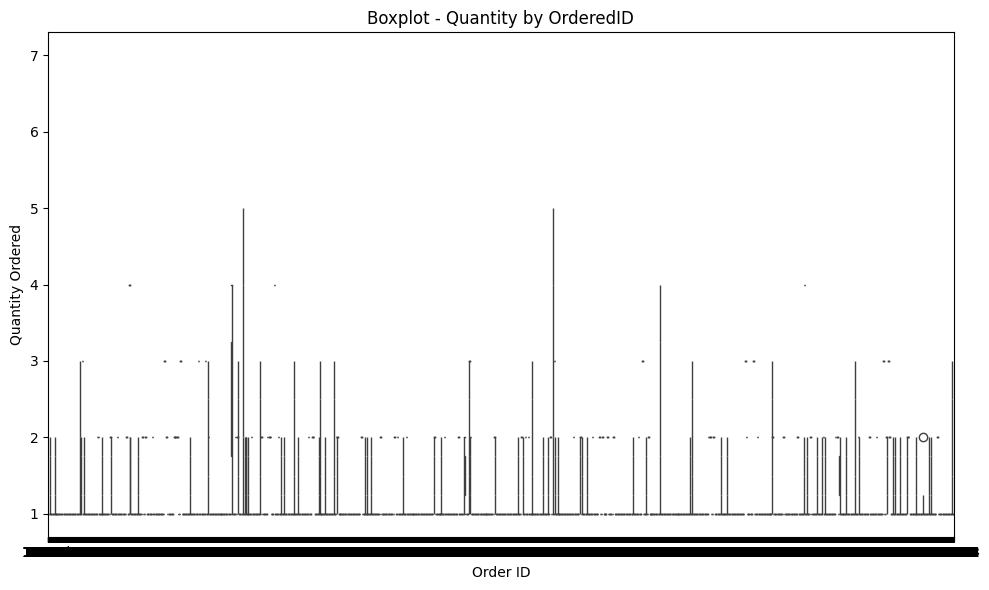

In [11]:
# sales_file=pd.read_csv('Sales.csv')
sales_file= pd.read_csv('Sales_April_2019.csv/Sales_April_2019.csv')
sales_file.info()
# print(sales_file)
sales_file=sales_file.dropna(subset=['Order ID','Quantity Ordered'])
sales_file.loc[:,'Quantity Ordered']=pd.to_numeric(sales_file['Quantity Ordered'],errors='coerce')
plt.figure(figsize=(10,6))
sns.boxplot(x='Order ID', y='Quantity Ordered', data=sales_file)
plt.xlabel('Order ID')
plt.ylabel('Quantity Ordered')
plt.title('Boxplot - Quantity by OrderedID')
plt.tight_layout()
plt.show()

In [37]:
print(sales_data.isnull().sum())

Order ID                1
Product             17539
Quantity Ordered        1
Price Each              1
Order Date              1
Purchase Address        1
dtype: int64


In [40]:
sales_file=sales_file.dropna(subset=['Order ID','Quantity Ordered'])
sales_file.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18289,18289,18289.0,18289,18289,18289
unique,17537,19,7.0,18,13583,17119
top,178158,Lightning Charging Cable,1.0,14.95,04/02/19 13:24,"821 Elm St, Austin, TX 73301"
freq,4,2201,16558.0,2201,7,4


In [32]:
print(sales_data.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [41]:
sales_data.describe()

,Product
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [36]:
sales_data.drop_duplicates(subset='Order ID', inplace= True)
sales_data.describe()

,Product
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [20]:
sales_data['Product'] = pd.to_numeric(sales_data['Product'], errors='coerce')


In [22]:
print(sales_data.isnull().sum())

Order ID                1
Product             17539
Quantity Ordered        1
Price Each              1
Order Date              1
Purchase Address        1
dtype: int64


In [ ]:
# step1 - find out duplicate from all columns
# 2. remove nulll values
#3. Detecting Outliers for co relation